In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [24]:
df=pd.read_csv('loan_approval_dataset.csv')

In [25]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [27]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [30]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [31]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [33]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [34]:
df.columns = df.columns.str.strip()

print(df.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [ ]:
df['loan_status'] = df['loan_status'].str.strip().str.lower()
df['loan_status'] = df['loan_status'].map({'approved': 1, 'rejected': 0})


df['loan_status'].value_counts()


loan_status
1    2656
0    1613
Name: count, dtype: int64

In [37]:
# One-hot encode categorical features
categorical_cols = ['education', 'self_employed']  # add any other categorical columns if needed
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check result
df.head()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,False,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,True,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,False,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,False,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,True,True


In [38]:
df.dtypes

loan_id                     int64
no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
education_ Not Graduate      bool
self_employed_ Yes           bool
dtype: object

In [39]:
df['loan_status'].value_counts()


loan_status
1    2656
0    1613
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split


X = df.drop(['loan_status', 'loan_id'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
print("Train set class counts:")
print(y_train.value_counts())

print("\nTest set class counts:")
print(y_test.value_counts())


Train set class counts:
loan_status
1    2125
0    1290
Name: count, dtype: int64

Test set class counts:
loan_status
1    531
0    323
Name: count, dtype: int64


In [42]:
%pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(y_train_res.value_counts())


Note: you may need to restart the kernel to use updated packages.
loan_status
1    2125
0    2125
Name: count, dtype: int64


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)


y_pred_lr = lr.predict(X_test)


print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       323
           1       0.83      0.84      0.84       531

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854

Confusion Matrix:
 [[232  91]
 [ 85 446]]


In [44]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)


y_pred_dt = dt.predict(X_test)


print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[314   9]
 [  8 523]]


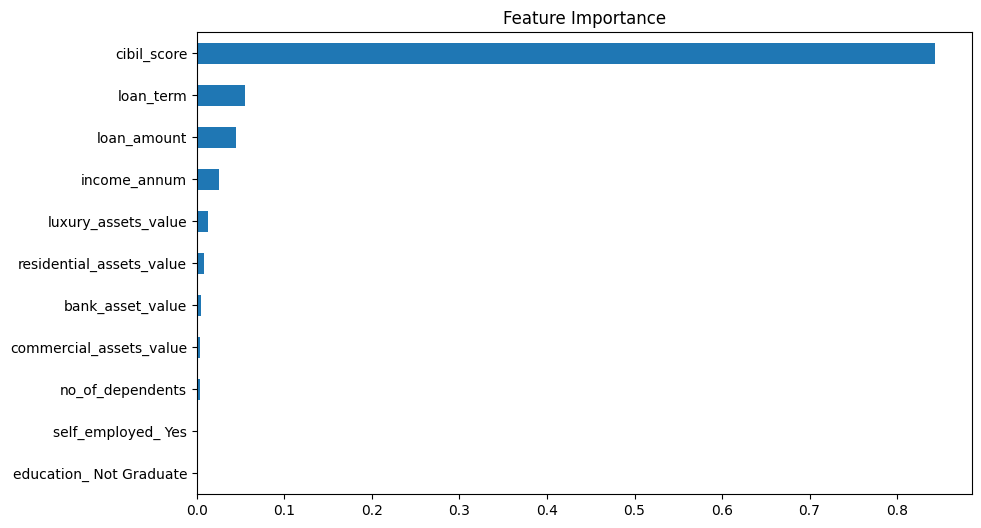

In [45]:

feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()
